In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import glob

In [2]:
MachineLearningCVE = "/Users/marinamoskowitz/Documents/Fall 2019/Research/MachineLearningCVE"
all_files = glob.glob(MachineLearningCVE + "/*.csv")

file_list = []
count = 0

for filename in all_files:
    df = pd.read_csv(filename)
    print('len of rows in csv', len(df))
    
    # making sure the current csv is appending to the main df
    count = count + len(df)
    print('len of rows in df', count)
    
    # removing white spaces before and after the name of each feature
    df.columns = df.columns.str.lstrip()
    df.columns = df.columns.str.rstrip()
    
    file_list.append(df)
    print('len of list to append all the data', len(file_list))
    
    print(filename)
    print(df.iloc[:,-1].unique())

data = pd.concat(file_list, axis=0, ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


len of rows in csv 288602
len of rows in df 288602
len of list to append all the data 1
/Users/marinamoskowitz/Documents/Fall 2019/Research/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
['BENIGN' 'Infiltration']


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


len of rows in csv 529918
len of rows in df 818520
len of list to append all the data 2
/Users/marinamoskowitz/Documents/Fall 2019/Research/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv
['BENIGN']
len of rows in csv 191033
len of rows in df 1009553
len of list to append all the data 3
/Users/marinamoskowitz/Documents/Fall 2019/Research/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv
['BENIGN' 'Bot']
len of rows in csv 286467
len of rows in df 1296020
len of list to append all the data 4
/Users/marinamoskowitz/Documents/Fall 2019/Research/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
['BENIGN' 'PortScan']
len of rows in csv 225745
len of rows in df 1521765
len of list to append all the data 5
/Users/marinamoskowitz/Documents/Fall 2019/Research/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
['BENIGN' 'DDoS']
len of rows in csv 445909
len of rows in df 1967674
len of list to append all the data 6
/Users/marinamoskowitz/Doc

In [3]:
data.shape

(2830743, 79)

In [4]:
print(data['Label'].unique())

['BENIGN' 'Infiltration' 'Bot' 'PortScan' 'DDoS' 'FTP-Patator'
 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk'
 'DoS GoldenEye' 'Heartbleed' 'Web Attack � Brute Force'
 'Web Attack � XSS' 'Web Attack � Sql Injection']


In [5]:
print(data['Label'].nunique())

15


In [6]:
df_copy = data.copy()
print(df_copy['Label'].unique())
print(df_copy['Label'].nunique())

# combining minorty classes to help balance the classes 
size_mapping = {'BENIGN':0, 'FTP-Patator':1,'SSH-Patator':1,'DoS Hulk':2, 'DoS GoldenEye':2,'DoS slowloris':2,'DoS Slowhttptest':2,'Heartbleed':2,'Web Attack � Brute Force':3,'Web Attack � XSS':3,'Web Attack � Sql Injection':3,'Infiltration':4,'Bot':5,'PortScan':6,'DDoS':7}
df_copy['Label'] = df_copy['Label'].map(size_mapping)
#print(df_copy1['Label'])

print(df_copy['Label'].nunique())
print(df_copy['Label'].unique())

['BENIGN' 'Infiltration' 'Bot' 'PortScan' 'DDoS' 'FTP-Patator'
 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk'
 'DoS GoldenEye' 'Heartbleed' 'Web Attack � Brute Force'
 'Web Attack � XSS' 'Web Attack � Sql Injection']
15
8
[0 4 5 6 7 1 2 3]


In [7]:
df_copy.head()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
Destination Port               int64
Flow Duration                  int64
Total Fwd Packets              int64
Total Backward Packets         int64
Total Length of Fwd Packets    int64
Total Length of Bwd Packets    int64
Fwd Packet Length Max          int64
Fwd Packet Length Min          int64
Fwd Packet Length Mean         float64
Fwd Packet Length Std          float64
Bwd Packet Length Max          int64
Bwd Packet Length Min          int64
Bwd Packet Length Mean         float64
Bwd Packet Length Std          float64
Flow Bytes/s                   object
Flow Packets/s                 object
Flow IAT Mean                  float64
Flow IAT Std                   float64
Flow IAT Max                   int64
Flow IAT Min                   int64
Fwd IAT Total                  int64
Fwd IAT Mean                   float64
Fwd IAT Std                    float64
Fwd IAT Max       

In [8]:
# Converting Flow Bytes/s and Flow Packet/s to type float64 instead of
# object
df_copy['Flow Bytes/s']=df_copy['Flow Bytes/s'].astype('float64')
df_copy['Flow Packets/s']=df_copy['Flow Packets/s'].astype('float64')

# Exploring Data

In [9]:
# dictionary of features to be dropped 
remove_features = []

### Missing Values & Imputing 

In [10]:
# determing if there is any features with missing values that would need 
# to be imputed or droped

features = df_copy.isnull().sum().sort_values(ascending = False)
percent = (df_copy.isnull().sum()/df_copy.isnull().count()*100).sort_values(ascending = False)
missing_df_data = pd.concat([features, percent], axis=1, keys=['Total', 'Percent'])
missing_df_data.head(5)

# Flow Bytes/s needs to be imputed 

,Total,Percent
Flow Bytes/s,1358,0.047973
Label,0,0.000000
Flow IAT Min,0,0.000000
Fwd IAT Mean,0,0.000000
Fwd IAT Std,0,0.000000


In [11]:
# converting inf to nan
pd.set_option('mode.use_inf_as_na', True) 

# Imputing null Flow Bytes/s with the mean 
df_copy['Flow Bytes/s'].fillna(df_copy['Flow Bytes/s'].mean(),inplace=True)
df_copy['Flow Packets/s'].fillna(df_copy['Flow Packets/s'].mean(),inplace=True)

### Skewed Columns

In [12]:
pd.options.display.float_format = '{:,.2f}'.format
sk_df = pd.DataFrame([{'column': c, 'unique': df_copy[c].nunique(), 'skewness': df_copy[c].value_counts(normalize=True).values[0] * 100} for c in df_copy.columns])
sk_df = sk_df.sort_values('skewness', ascending=False)
sk_df

,column,skewness,unique
60,Bwd Avg Packets/Bulk,100.00,1
61,Bwd Avg Bulk Rate,100.00,1
56,Fwd Avg Bytes/Bulk,100.00,1
57,Fwd Avg Packets/Bulk,100.00,1
58,Fwd Avg Bulk Rate,100.00,1
33,Bwd URG Flags,100.00,1
31,Bwd PSH Flags,100.00,1
59,Bwd Avg Bytes/Bulk,100.00,1
49,CWE Flag Count,99.99,2
32,Fwd URG Flags,99.99,2


### Outlier Detection

Testing to see if any of the skewed features was of an attack label because this could be an indication for features of uncommon vulnerablities. This is important because the labels are imbalnced so skewed features could be because it is related to minority label. 

In [13]:
df_copy[(df_copy['CWE Flag Count'] == 0) & (df_copy['Label'] == 1)].count().head()
# benign: 2272782 = 99% of this label
# FTP-Patator & SSH-Patator: 13835 = 100% of this label
# DoS: 252672 = 100% of this label
# web: 2180 = 100% of this label
# infiltration: 36 = 100% of this label
# bot: 1966 = 100% of this label
# port_scan: 158930 = 100% of this label
# DDoS: 128027 = 100% of this label

df_copy[(df_copy['CWE Flag Count'] == 1) & (df_copy['Label'] == 7)].count().head()
# benign: 315 = .01% of this label
# FTP-Patator & SSH-Patator: 0
# DoS: 0
# web: 0 
# infiltration: 0
# bot: 0
# port_scan: 0
# DDoS: 0

# this feature is not a strong indicator of any particular label 

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
dtype: int64

In [14]:
df_copy[(df_copy['URG Flag Count'] == 1) & (df_copy['Label'] == 5)].count().head()
# benign: 263592
# FTP-Patator & SSH-Patator: 2901
# DoS: 1054
# web: 158 
# infiltration: 1
# bot: 707
# port_scan: 4
# DDoS: 3

Destination Port               707
Flow Duration                  707
Total Fwd Packets              707
Total Backward Packets         707
Total Length of Fwd Packets    707
dtype: int64

In [15]:
df_copy[(df_copy['Fwd URG Flags'] == 1) & (df_copy['Label'] == 0)].count().head()
# benign: 315
# FTP-Patator & SSH-Patator: 0
# DoS: 0
# web: 0 
# infiltration: 0
# bot: 0
# port_scan: 0
# DDoS: 0

# this feature is not a strong indicator of any particular label 

Destination Port               315
Flow Duration                  315
Total Fwd Packets              315
Total Backward Packets         315
Total Length of Fwd Packets    315
dtype: int64

In [16]:
df_copy[(df_copy['RST Flag Count'] == 1) & (df_copy['Label'] == 7)].count().head()
# benign: 686
# FTP-Patator & SSH-Patator: 0
# DoS: 0
# web: 0 
# infiltration: 0
# bot: 0
# port_scan: 0
# DDoS: 0

# this feature is not a strong indicator of any particular label 

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
dtype: int64

In [17]:
df_copy[(df_copy['ECE Flag Count'] == 1) & (df_copy['Label'] == 7)].count().head()
# benign: 686
# FTP-Patator & SSH-Patator: 0
# DoS: 0
# web: 0 
# infiltration: 0
# bot: 0
# port_scan: 0
# DDoS: 0

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
dtype: int64

Removing Skewed Columns 99.9% or greater

In [18]:
remove_features.extend(sk_df[sk_df.skewness > 99].column.tolist())
print(remove_features)

df_copy.drop(remove_features, axis=1, inplace=True)

['Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd URG Flags', 'Bwd PSH Flags', 'Bwd Avg Bytes/Bulk', 'CWE Flag Count', 'Fwd URG Flags', 'RST Flag Count', 'ECE Flag Count']


In [19]:
sk_df = pd.DataFrame([{'column': c, 'unique': df_copy[c].nunique(), 'skewness': df_copy[c].value_counts(normalize=True).values[0] * 100} for c in df_copy.columns])
sk_df = sk_df.sort_values('skewness', ascending=False)
sk_df.head(10)

,column,skewness,unique
40,FIN Flag Count,96.46,2
41,SYN Flag Count,95.36,2
30,Fwd PSH Flags,95.36,2
59,Active Std,92.74,202826
63,Idle Std,91.90,197616
44,URG Flag Count,90.52,2
66,Label,80.30,8
61,Active Min,80.26,175670
60,Active Max,80.26,299565
58,Active Mean,80.26,326325


Further investigation of features with only two unique values, but
less than 99% skewed. These features will not be removed. Investigation
is to understand what features are related to which types of attacks

In [20]:
df_copy[(df_copy['FIN Flag Count'] == 1) & (df_copy['Label'] == 7)].count().head()
# benign: 41188 = 1.8% of this label
# FTP-Patator & SSH-Patator: 0
# DoS: 58936 = 23% of this label 
# web: 0 
# infiltration: 0
# bot: 0
# port_scan: 0
# DDoS: 27 = .02%

# when FIN Flag Count = 1, labels are benign, DoS, and DDoS, with majority
# being DoS

Destination Port               27
Flow Duration                  27
Total Fwd Packets              27
Total Backward Packets         27
Total Length of Fwd Packets    27
dtype: int64

In [21]:
df_copy[(df_copy['SYN Flag Count'] == 1) & (df_copy['Label'] == 7)].count().head()
# benign: 124762 = 5.5% of this label 
# FTP-Patator & SSH-Patator: 3961 = 29% of this label
# DoS: 2735 = 1% of this label
# web: 0 
# infiltration: 20 = 55% of this label 
# bot: 0
# port_scan: 0
# DDoS: 0

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
dtype: int64

In [22]:
df_copy[(df_copy['Fwd PSH Flags'] == 1) & (df_copy['Label'] == 0)].count().head()
# benign: 124762
# FTP-Patator & SSH-Patator: 3961
# DoS: 2735
# web: 0 
# infiltration: 20
# bot: 0
# port_scan: 0
# DDoS: 0

# Fwd PSH Flags and SYN Flag Count could be related and combined into 
# one feature? 

Destination Port               124762
Flow Duration                  124762
Total Fwd Packets              124762
Total Backward Packets         124762
Total Length of Fwd Packets    124762
dtype: int64

### Coeffients

In [23]:
coef = df_copy.corr().sort_values(by = 'Label')
coef.Label.iloc[26:45]

Subflow Fwd Packets           -0.00
Subflow Bwd Packets           -0.00
Total Backward Packets        -0.00
act_data_pkt_fwd              -0.00
Total Length of Bwd Packets   -0.00
Subflow Bwd Bytes             -0.00
Fwd Header Length              0.00
Fwd Header Length.1            0.00
Bwd Header Length              0.00
min_seg_size_forward           0.00
Active Mean                    0.01
Bwd IAT Std                    0.01
Down/Up Ratio                  0.02
Active Min                     0.03
ACK Flag Count                 0.03
Fwd IAT Mean                   0.03
FIN Flag Count                 0.03
Flow Duration                  0.04
Fwd IAT Total                  0.05
Name: Label, dtype: float64

In [24]:
# removing features with coeffient equal to -0.00 or 0.00
remove_features = []
remove_features = ['Total Fwd Packets', 'Subflow Fwd Packets', 'Subflow Bwd Packets',
                  'Total Backward Packets', 'act_data_pkt_fwd', 'Total Length of Bwd Packets', 
                  'Subflow Bwd Bytes', 'Subflow Bwd Bytes', 'Fwd Header Length', 
                  'Fwd Header Length.1', 'Bwd Header Length', 'min_seg_size_forward']
df_copy.drop(remove_features, axis=1, inplace=True)

### Coliniarity

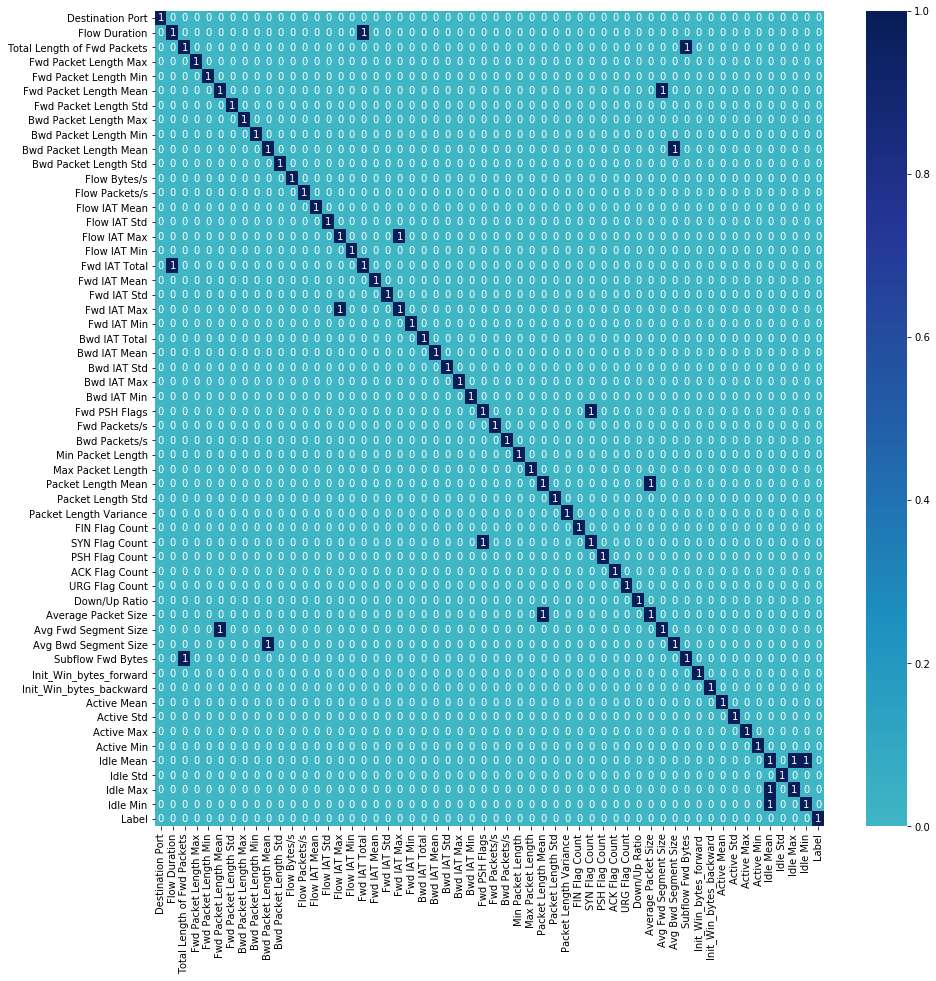

In [25]:
coef = df_copy.corr()
high_corr = (coef >= 0.99).astype('uint8')
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, cmap='YlGnBu', annot=True, center=0.0)
plt.show()

In [26]:
remove_features = []

In [27]:
print('Fwd IAT Total', df_copy['Fwd IAT Total'].nunique())
print('Flow Duration', df_copy['Flow Duration'].nunique())

# Fwd IAT Total 493098
# Flow Duration 1050899

remove_features.append('Fwd IAT Total')

Fwd IAT Total 493098
Flow Duration 1050899


In [28]:
print('Subflow Fwd Bytes', df_copy['Subflow Fwd Bytes'].nunique())
print('Total Length of Fwd Packets', df_copy['Total Length of Fwd Packets'].nunique())

# Subflow Fwd Bytes 17928
# Total Length of Fwd Packets 17928

remove_features.append('Total Length of Fwd Packets')

Subflow Fwd Bytes 17928
Total Length of Fwd Packets 17928


In [29]:
print('Avg Fwd Segment Size', df_copy['Avg Fwd Segment Size'].nunique())
print('Fwd Packet Length Mean', df_copy['Fwd Packet Length Mean'].nunique())

# Avg Fwd Segment Size 99716
# Fwd Packet Length Mean 99716

remove_features.append('Avg Fwd Segment Size')

Avg Fwd Segment Size 99716
Fwd Packet Length Mean 99716


In [30]:
print('Avg Bwd Segment Size', df_copy['Avg Bwd Segment Size'].nunique())
print('Bwd Packet Length Mean', df_copy['Bwd Packet Length Mean'].nunique())

# Avg Bwd Segment Size 147611
# Bwd Packet Length Mean 147614

remove_features.append('Avg Bwd Segment Size')

Avg Bwd Segment Size 147611
Bwd Packet Length Mean 147614


In [31]:
print('SYN Flag Count', df_copy['SYN Flag Count'].nunique())
print('Fwd PSH Flags', df_copy['Fwd PSH Flags'].nunique())

# SYN Flag Count 2
# Fwd PSH Flags 2

# remove_features.append('SYN Flag Count')

# create a new feature here by combining these two 

SYN Flag Count 2
Fwd PSH Flags 2


Both the SYN and FIN control flags are not normally set in the same TCP segment header. The SYN flag synchronizes sequence numbers to initiate a TCP connection. The FIN flag indicates the end of data transmission to finish a TCP connection. Their purposes are mutually exclusive. A TCP header with the SYN and FIN flags set is anomalous TCP behavior, causing various responses from the recipient, depending on the OS. An attacker can send a segment with both flags set to see what kind of system reply is returned and thereby determine what kind of OS is on the receiving end. The attacker can then use any known system vulnerabilities for further attacks.

In [32]:
print('Average Packet Size', df_copy['Average Packet Size'].nunique())
print('Packet Length Mean', df_copy['Packet Length Mean'].nunique())

# Average Packet Size 212207
# Packet Length Mean 215826

remove_features.append('Average Packet Size')

Average Packet Size 212207
Packet Length Mean 215826


In [33]:
print('Flow IAT Max', df_copy['Flow IAT Max'].nunique())
print('Fwd IAT Max', df_copy['Fwd IAT Max'].nunique())

# Flow IAT Max 580289
# Fwd IAT Max 437316

remove_features.append('Fwd IAT Max')

Flow IAT Max 580289
Fwd IAT Max 437316


In [34]:
print('Idle Mean', df_copy['Idle Mean'].nunique())
print('Idle Max', df_copy['Idle Max'].nunique())
print('Idle Min', df_copy['Idle Min'].nunique())

# Idle Mean 222016
# Idle Max 149737
# Idle Min 223888

remove_features.append('Idle Mean')

Idle Mean 222016
Idle Max 149737
Idle Min 223888


In [35]:
df_copy.drop(remove_features, axis=1, inplace=True)

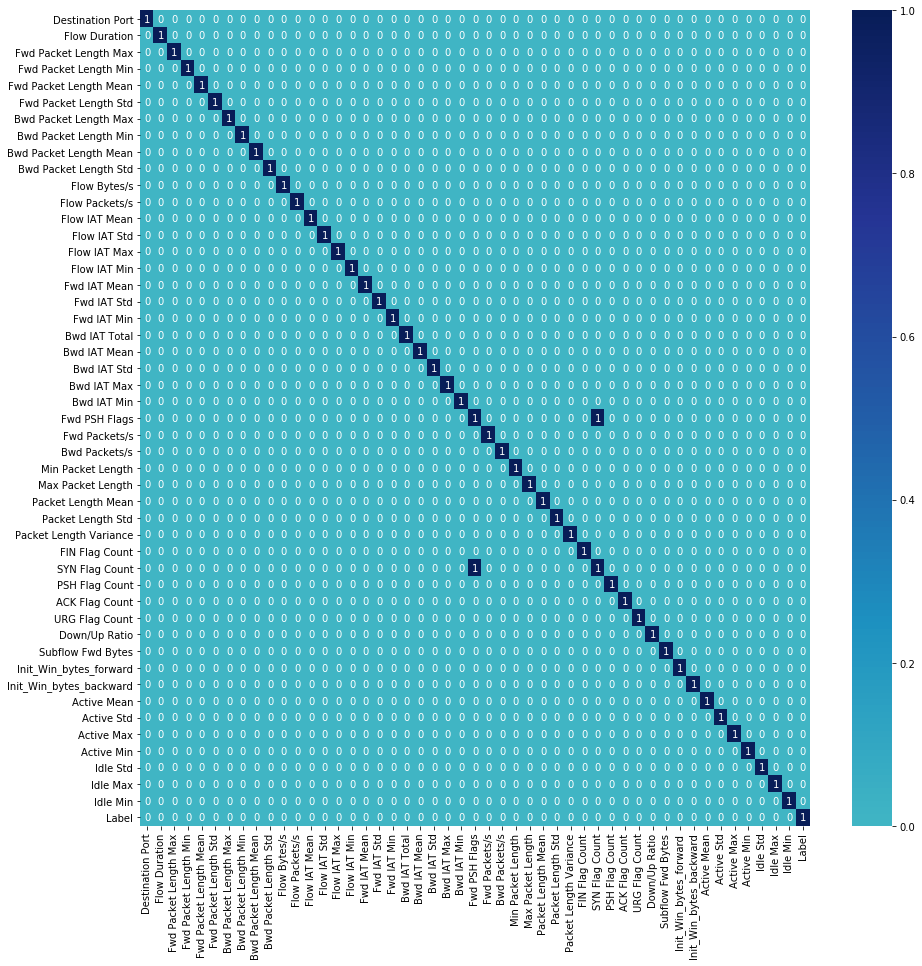

In [36]:
coef = df_copy.corr()
high_corr = (coef >= 0.99).astype('uint8')
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, cmap='YlGnBu', annot=True, center=0.0)
plt.show()

In [ ]:
df_copy.to_csv('alldata.csv')